# **(CAR PRICE ANALYSIS)**

## Objectives

* Fetch data from Kaggle and save as raw data"

## Inputs

* A virtual environment is needed to run the notebook

## Outputs

* A transformed data ready for data visualisation using descriptive statistics, correlation and predictive analysis





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [260]:
import os
current_dir = os.getcwd()
current_dir


'c:\\'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [261]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [262]:
current_dir = os.getcwd()
current_dir

'c:\\'

# Section 1

Step 1: Extract - Load the Dataset

In [263]:
# The cleaned dataframe 'df' is already loaded in the notebook.
# Display the first few rows
df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,car_brand_peugeot,car_brand_plymouth,car_brand_porsche,car_brand_renault,car_brand_saab,car_brand_subaru,car_brand_toyota,car_brand_volkswagen,car_brand_volvo,car_brand
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,dohc,four,...,False,False,False,False,False,False,False,False,False,alfa-romero
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,dohc,four,...,False,False,False,False,False,False,False,False,False,alfa-romero
2,3,1,alfa-romero quadrifoglio,94.5,171.2,65.5,52.4,2823,ohcv,six,...,False,False,False,False,False,False,False,False,False,alfa-romero
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,ohc,four,...,False,False,False,False,False,False,False,False,False,audi
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,ohc,five,...,False,False,False,False,False,False,False,False,False,audi


---

# Section 2

Step 2: Transform - Data Cleaning and Feature Engineering

2.1 Understand  the Dataset

Check how many rows/columns it has

In [264]:
# Basic information

# Remove specific one-hot encoded columns
df_filtered = df.drop(columns=['carbody_hatchback', 'carbody_sedan'], errors='ignore')

# Show info for the first 26 columns after dropping
df_filtered.iloc[:, :26].info()



# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    category
 2   CarName           203 non-null    object  
 3   wheelbase         205 non-null    float64 
 4   carlength         205 non-null    float64 
 5   carwidth          205 non-null    float64 
 6   carheight         205 non-null    float64 
 7   curbweight        205 non-null    int64   
 8   enginetype        205 non-null    category
 9   cylindernumber    205 non-null    category
 10  enginesize        205 non-null    int64   
 11  fuelsystem        205 non-null    category
 12  boreratio         205 non-null    float64 
 13  stroke            205 non-null    float64 
 14  compressionratio  205 non-null    float64 
 15  horsepower        205 non-null    int64   
 16  peakrpm           205 non-

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,car_brand_peugeot,car_brand_plymouth,car_brand_porsche,car_brand_renault,car_brand_saab,car_brand_subaru,car_brand_toyota,car_brand_volkswagen,car_brand_volvo,car_brand
count,205.000000,205.0,203,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,...,205,205,205,205,205,205,205,205,205,203
unique,NaN,6.0,141,NaN,NaN,NaN,NaN,NaN,7,7,...,2,2,2,2,2,2,2,2,2,22
top,NaN,0.0,toyota corolla,NaN,NaN,NaN,NaN,NaN,ohc,four,...,False,False,False,False,False,False,False,False,False,toyota
freq,NaN,67.0,6,NaN,NaN,NaN,NaN,NaN,148,159,...,194,198,200,203,199,195,173,193,194,32
mean,103.000000,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,59.322565,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,52.000000,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,103.000000,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,154.000000,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.2 Handle Missing Values


In [265]:
# Check for missing values
df.isnull().sum()

car_ID                  0
symboling               0
CarName                 2
wheelbase               0
carlength               0
                       ..
car_brand_subaru        0
car_brand_toyota        0
car_brand_volkswagen    0
car_brand_volvo         0
car_brand               2
Length: 80, dtype: int64

In [266]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

# No missing  values found in cells

2.3 Encode Categorical Variables

In [267]:
# All major categorical columns, including 'car_brand', have already been one-hot encoded in 'df'.
# No further action is needed here.


Column Summary

In [268]:
# Summary of all columns: data type, nulls, unique values, example values
summary = pd.DataFrame 
({'dtype': df.dtypes,
    'nulls': df.isnull().sum(),
    'unique_values': df.nunique(),
    'example_values': df.apply(lambda x: x.unique()[:5])})


{'dtype': car_ID                     int64
 symboling               category
 CarName                   object
 wheelbase                float64
 carlength                float64
                           ...   
 car_brand_subaru            bool
 car_brand_toyota            bool
 car_brand_volkswagen        bool
 car_brand_volvo             bool
 car_brand                 object
 Length: 80, dtype: object,
 'nulls': car_ID                  0
 symboling               0
 CarName                 2
 wheelbase               0
 carlength               0
                        ..
 car_brand_subaru        0
 car_brand_toyota        0
 car_brand_volkswagen    0
 car_brand_volvo         0
 car_brand               2
 Length: 80, dtype: int64,
 'unique_values': car_ID                  205
 symboling                 6
 CarName                 141
 wheelbase                53
 carlength                75
                        ... 
 car_brand_subaru          2
 car_brand_toyota          2
 car_br

Check unique brands


In [269]:

# Extract car brand from CarName and show value counts
df['car_brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower() if isinstance(x, str) else None)
df['car_brand'].value_counts()

car_brand
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
peugeot        11
volvo          11
subaru         10
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [270]:
# Check for duplicates in Brands

df["CarName"] = df["CarName"].replace({"vw" : "volkswagen","vokswagen" : "volkswagen","porcshce" : "porsche","maxda" : "mazda","toyouta" : "toyota"})


In [271]:
# Change brand prefix

# Replace 'maxda' at the start of the string with 'mazda'
df['CarName'] = df['CarName'].str.replace(r'^maxda', 'mazda', case=False, regex=True)


---

In [272]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.000000,52.000000,103.000000,154.000000,205.000000
wheelbase,205.0,98.756585,6.021776,86.600000,94.500000,97.000000,102.400000,120.900000
carlength,205.0,174.049268,12.337289,141.100000,166.300000,173.200000,183.100000,208.100000
carwidth,205.0,65.907805,2.145204,60.300000,64.100000,65.500000,66.900000,72.300000
carheight,205.0,53.724878,2.443522,47.800000,52.000000,54.100000,55.500000,59.800000
curbweight,205.0,2555.565854,520.680204,1488.000000,2145.000000,2414.000000,2935.000000,4066.000000
enginesize,205.0,126.907317,41.642693,61.000000,97.000000,120.000000,141.000000,326.000000
boreratio,205.0,3.329756,0.270844,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,205.0,3.255415,0.313597,2.070000,3.110000,3.290000,3.410000,4.170000
compressionratio,205.0,10.142537,3.972040,7.000000,8.600000,9.000000,9.400000,23.000000


In [273]:
df[['car_brand', 'price']].sort_values(by='price', ascending=False).head()

,car_brand,price
74,buick,45400.0
16,bmw,41315.0
73,buick,40960.0
128,porsche,37028.0
17,bmw,36880.0


In [274]:
# Convert symboling to categorical since it's not a continuous variable
df['symboling'] = df['symboling'].astype('category')
df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,car_brand_peugeot,car_brand_plymouth,car_brand_porsche,car_brand_renault,car_brand_saab,car_brand_subaru,car_brand_toyota,car_brand_volkswagen,car_brand_volvo,car_brand
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,dohc,four,...,False,False,False,False,False,False,False,False,False,alfa-romero
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,dohc,four,...,False,False,False,False,False,False,False,False,False,alfa-romero
2,3,1,alfa-romero quadrifoglio,94.5,171.2,65.5,52.4,2823,ohcv,six,...,False,False,False,False,False,False,False,False,False,alfa-romero
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,ohc,four,...,False,False,False,False,False,False,False,False,False,audi
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,ohc,five,...,False,False,False,False,False,False,False,False,False,audi


Review Numeric Columns for Outliers

In [ ]:

# Check for very low prices or invalid values
df[df["price"] < 1000]

# Cars with very low horsepower
df[df["horsepower"] < 40]

# Cars with very small engine size
df[df["enginesize"] < 50]

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,car_brand_peugeot,car_brand_plymouth,car_brand_porsche,car_brand_renault,car_brand_saab,car_brand_subaru,car_brand_toyota,car_brand_volkswagen,car_brand_volvo,car_brand


2.4 Create New Features


Create price-to-performance ratio


Added derived metrics such as price per horsepower and price to weight ratio to better understand performance to cost characterics across the car brands

Create price-to-weight ratio

In [275]:

# Create price-to-performance ratio
df['price_to_horsepower'] = df['price'] / df['horsepower']
df['price_to_weight'] = df['price'] / df['curbweight']
df.head(5)

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,car_brand_peugeot,car_brand_plymouth,car_brand_porsche,car_brand_renault,car_brand_saab,car_brand_subaru,car_brand_toyota,car_brand_volkswagen,car_brand_volvo,car_brand
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,dohc,four,...,False,False,False,False,False,False,False,False,False,alfa-romero
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,dohc,four,...,False,False,False,False,False,False,False,False,False,alfa-romero
2,3,1,alfa-romero quadrifoglio,94.5,171.2,65.5,52.4,2823,ohcv,six,...,False,False,False,False,False,False,False,False,False,alfa-romero
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,ohc,four,...,False,False,False,False,False,False,False,False,False,audi
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,ohc,five,...,False,False,False,False,False,False,False,False,False,audi


Final ETL Checklist

Check for any remaining missing values


In [276]:
df.isnull().sum()


car_ID                  0
symboling               0
CarName                 2
wheelbase               0
carlength               0
                       ..
car_brand_subaru        0
car_brand_toyota        0
car_brand_volkswagen    0
car_brand_volvo         0
car_brand               2
Length: 80, dtype: int64

Check for duplicate rows

In [277]:
df.duplicated().sum()

np.int64(0)

Confirm categorical and numerical columns look right

In [278]:
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

print("Categorical:", cat_cols.tolist())
print("Numerical:", num_cols.tolist())

Categorical: ['CarName', 'car_model', 'car_brand']
Numerical: ['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'price_to_horsepower', 'price_to_weight']


Convert Categorical Columns to category Type

# Section 3

Step 3: Load - Save the Cleaned and Transformed Data

In [279]:
import os

# Ensure the directory exists
os.makedirs('../data/inputs/cleaned', exist_ok=True)

# Save transformed dataset
df.to_csv('../data/inputs/cleaned/cleaned_car_data.csv', index=False)

# Display transformed data
df.head()


,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,car_brand_peugeot,car_brand_plymouth,car_brand_porsche,car_brand_renault,car_brand_saab,car_brand_subaru,car_brand_toyota,car_brand_volkswagen,car_brand_volvo,car_brand
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,dohc,four,...,False,False,False,False,False,False,False,False,False,alfa-romero
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,dohc,four,...,False,False,False,False,False,False,False,False,False,alfa-romero
2,3,1,alfa-romero quadrifoglio,94.5,171.2,65.5,52.4,2823,ohcv,six,...,False,False,False,False,False,False,False,False,False,alfa-romero
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,ohc,four,...,False,False,False,False,False,False,False,False,False,audi
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,ohc,five,...,False,False,False,False,False,False,False,False,False,audi


In [280]:
import pandas as pd

# Load the cleaned dataset

In [281]:
# View rows that still contain 'maxda'
df[df['CarName'].str.contains("maxda", case=False, na=False)]


,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,car_brand_peugeot,car_brand_plymouth,car_brand_porsche,car_brand_renault,car_brand_saab,car_brand_subaru,car_brand_toyota,car_brand_volkswagen,car_brand_volvo,car_brand


In [282]:

# Step 1: Split 'CarName' into brand and model
df[['car_brand', 'car_model']] = df['CarName'].str.split(" ", n=1, expand=True)

# Step 2: Convert brands to lowercase (to standardize)
df['car_brand'] = df['car_brand'].str.lower()

# Step 3: Replace incorrect brand names with correct ones
df['car_brand'] = df['car_brand'].replace({
    'maxda': 'mazda',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'porcshce': 'porsche',
    'toyouta': 'toyota'
})

# Step 4: Reconstruct 'CarName' with corrected brand and original model
df['CarName'] = df['car_brand'] + ' ' + df['car_model']



In [283]:
df.head()


,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,car_brand_peugeot,car_brand_plymouth,car_brand_porsche,car_brand_renault,car_brand_saab,car_brand_subaru,car_brand_toyota,car_brand_volkswagen,car_brand_volvo,car_brand
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,dohc,four,...,False,False,False,False,False,False,False,False,False,alfa-romero
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,dohc,four,...,False,False,False,False,False,False,False,False,False,alfa-romero
2,3,1,alfa-romero quadrifoglio,94.5,171.2,65.5,52.4,2823,ohcv,six,...,False,False,False,False,False,False,False,False,False,alfa-romero
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,ohc,four,...,False,False,False,False,False,False,False,False,False,audi
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,ohc,five,...,False,False,False,False,False,False,False,False,False,audi


# ETL Process Summary
The ETL (Extract, Transform, Load) process was done using only Pandas and NumPy.

Extract:

I loaded the raw dataset from a CSV file into a Pandas DataFrame.

Transform:

Cleaned column names by converting everything to lowercase.
Created a new column carbrand by splitting the brand from the carname.
Fixed misspellings in brand names (e.g. 'maxda' to 'mazda').
Removed outliers based on price and horsepower.
Standardised categorical text (e.g. 'Gas' → 'gas') for consistency.
Converted text columns to category for better performance.
Added new features like:
price_per_hp: price divided by horsepower
power_to_weight: horsepower divided by curbweight

Load:

Saved the cleaned data to a new CSV file named cleaned_car_data.csv for analysis and visualisation.
The ETL process helped prepare the dataset for clean, structured, and reproducible analysis.

# Data Visualisation


1. Descriptive Statistics

Average Car Prices by Name

We will analyse the average car prices per name to understand pricing variations across different brands


Visualise data using Matplotlib, Seaborn and Plotly


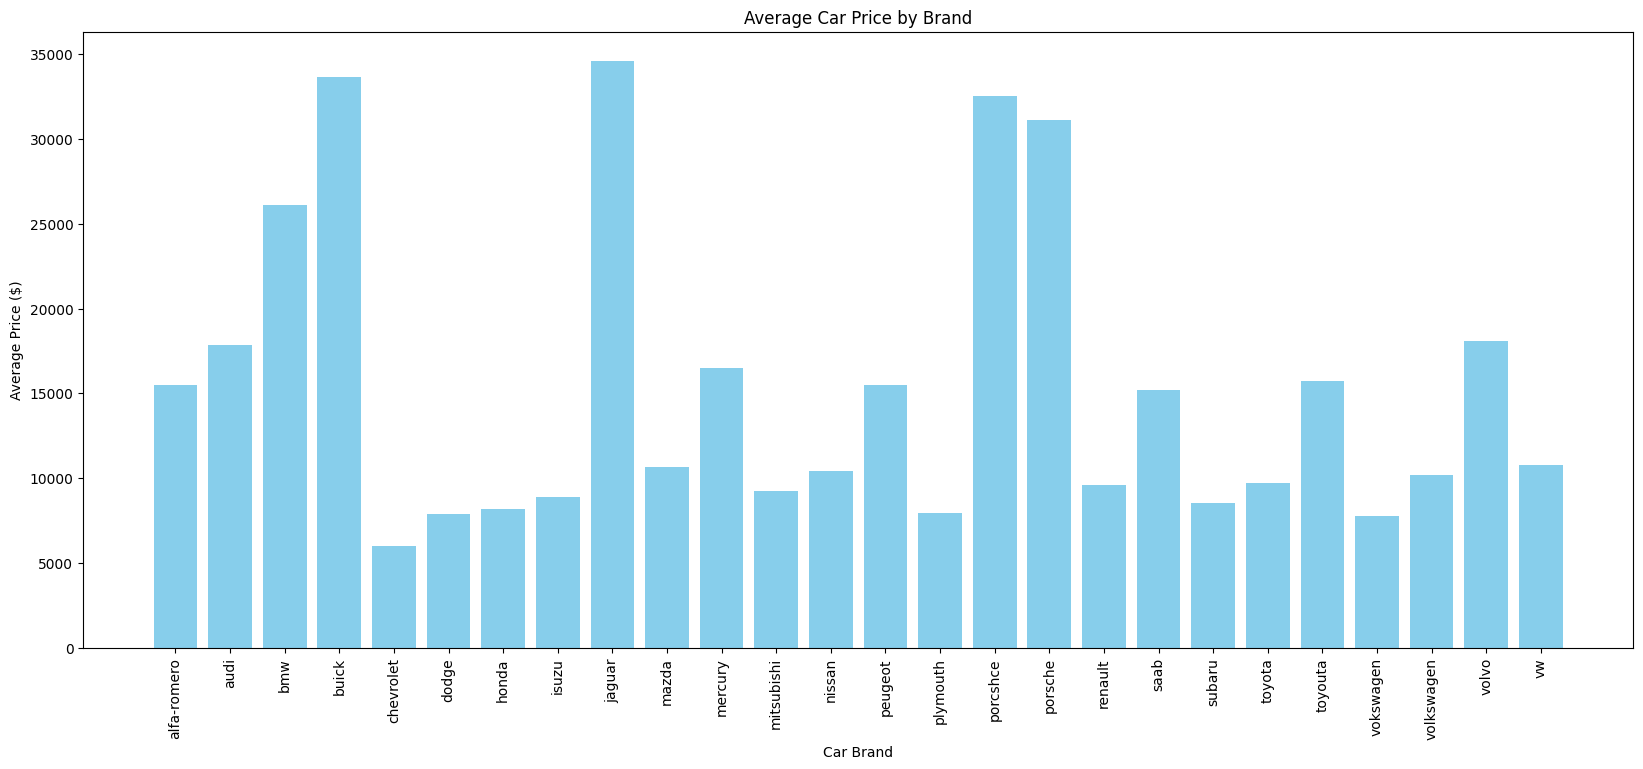

C:\Users\chris\AppData\Local\Temp\ipykernel_13076\185952809.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




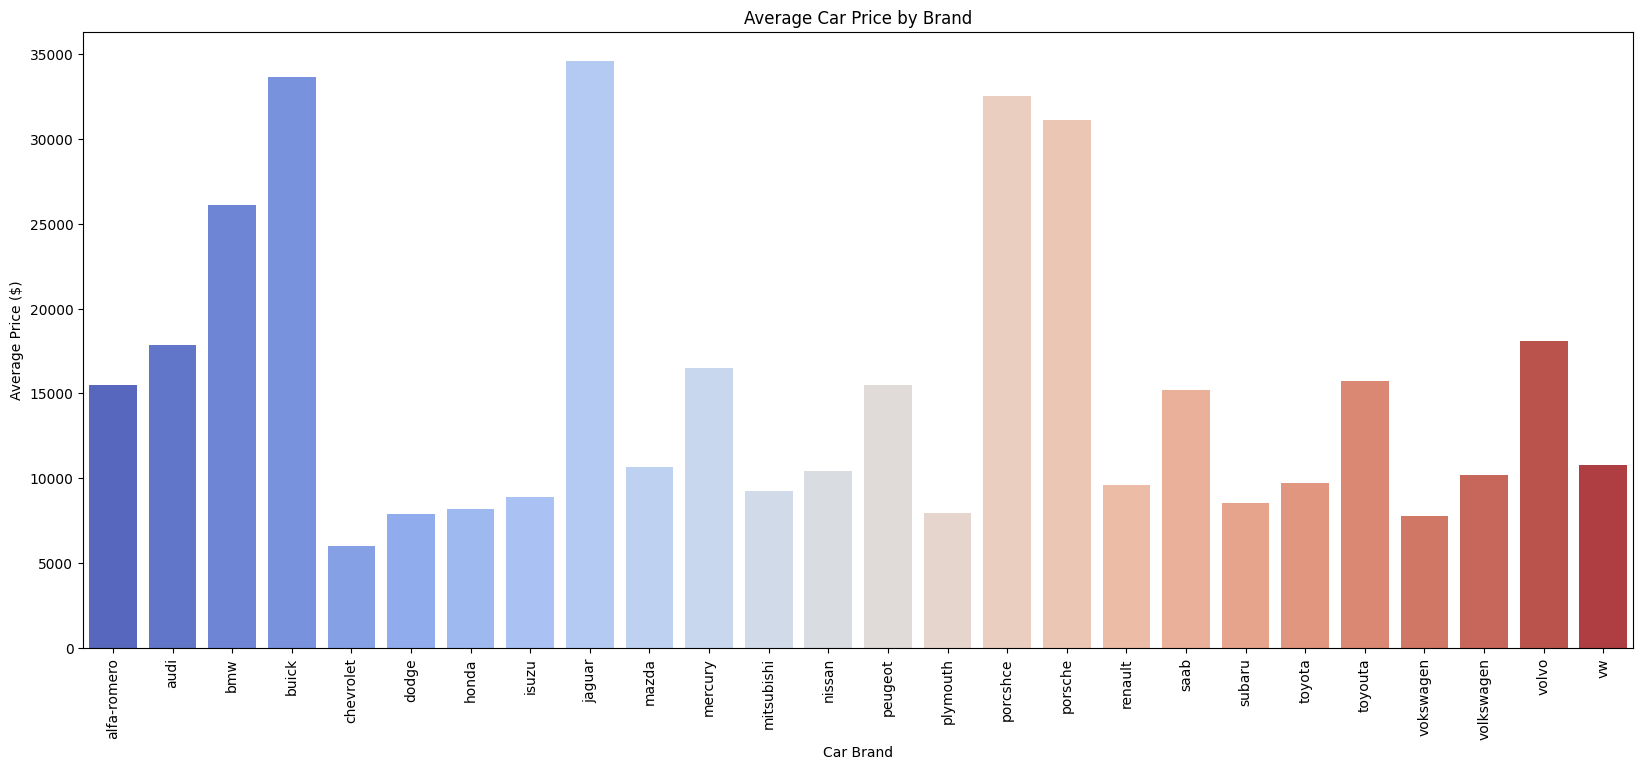

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Use the available brand_avg_price DataFrame
# Matplotlib Bar Chart
plt.figure(figsize=(20, 8))
plt.bar(brand_avg_price['car_brand'], brand_avg_price['price'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Car Brand")
plt.ylabel("Average Price ($)")
plt.title("Average Car Price by Brand")
plt.show()

# Seaborn Bar Chart
plt.figure(figsize=(20, 8))
sns.barplot(x='car_brand', y='price', data=brand_avg_price, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Car Price by Brand")
plt.ylabel("Average Price ($)")
plt.xlabel("Car Brand")
plt.show()

# Plotly Interactive Bar Chart
fig = px.bar(brand_avg_price, x='car_brand', y='price', color='price', title="Average Car Price by Brand")
fig.show()


2. Correlation Analysis

Visualising relationships between attributes and car price

We will generate a correlation heatmap to examine how different features impact pricing

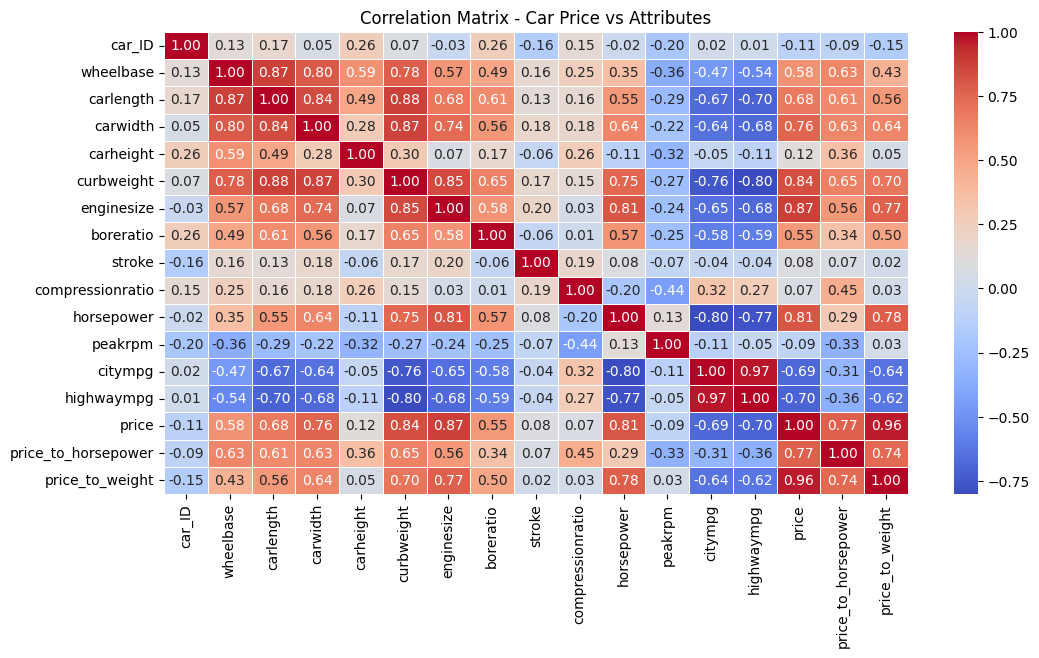

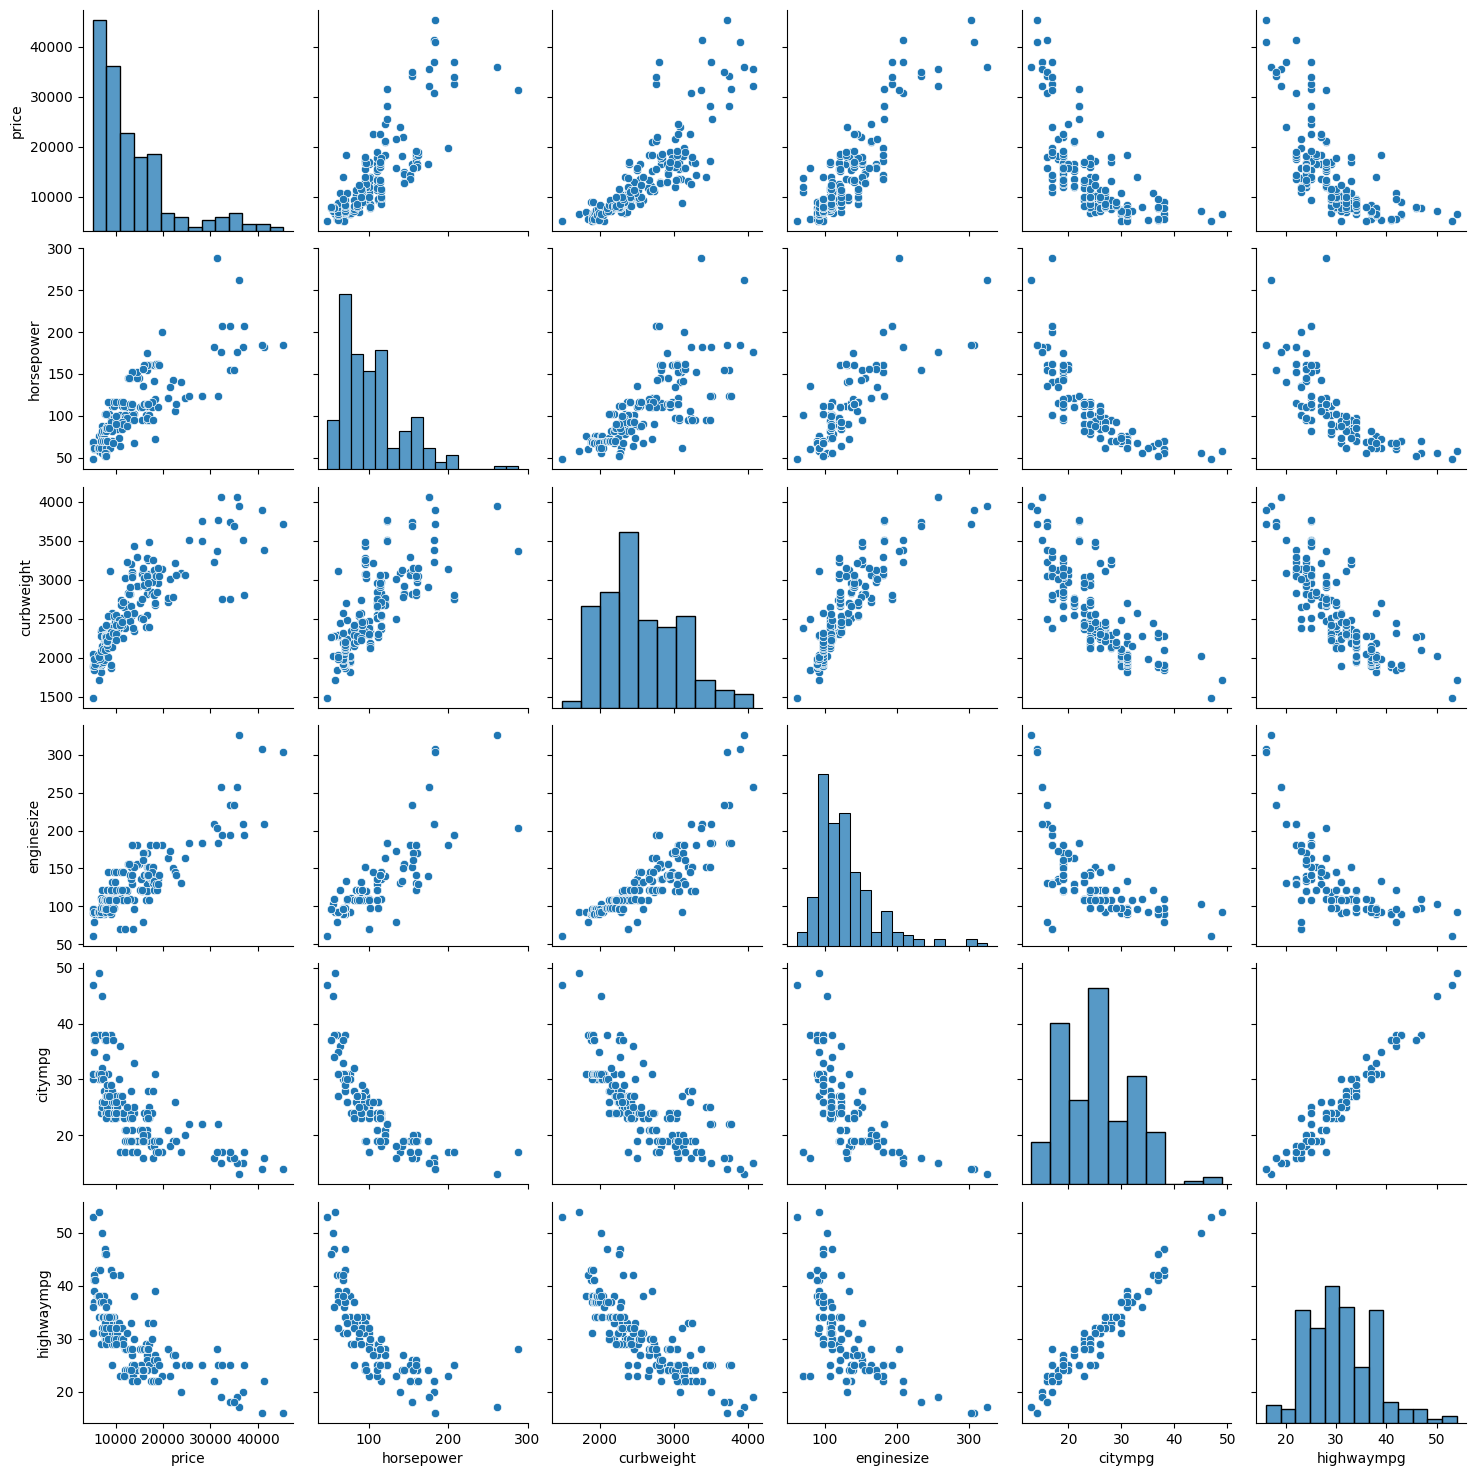

In [286]:
import numpy as np

# Compute correlation matrix using only numeric columns
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Seaborn Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix - Car Price vs Attributes")
plt.show()

# Pairplot for selected features
selected_features = ['price', 'horsepower', 'curbweight', 'enginesize', 'citympg', 'highwaympg']
sns.pairplot(df[selected_features])
plt.show()


3. Predictive Analysis

Developing & Visualising Analytical Reports for Estimation

We will use a simple regression model to estimate car prices based on key attributes

Note: you may need to restart the kernel to use updated packages.


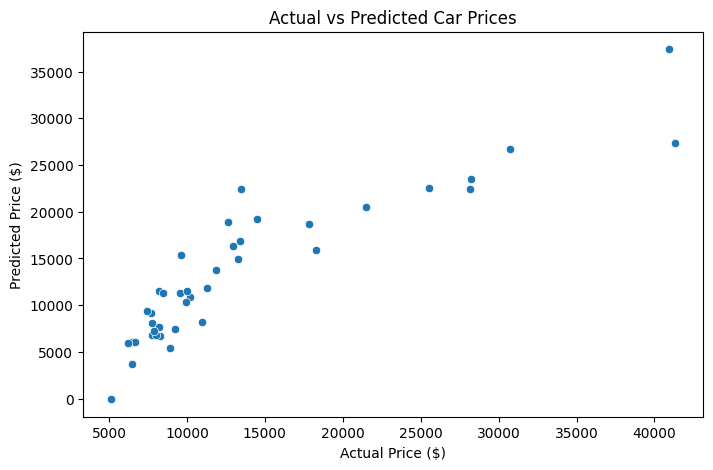

In [287]:
%pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features for prediction
features = ['horsepower', 'curbweight', 'enginesize', 'citympg', 'highwaympg']
X = df[features]
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict car prices
y_pred = model.predict(X_test)

# Scatterplot of actual vs predicted prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs Predicted Car Prices")
plt.show()
